In [18]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for x in X_test:
        # Вычисляем расстояние от x до каждого обучающего примера
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
        
        k_neighbors_indices = np.argsort(distances)[:k]
        
        k_neighbors_labels = [y_train[i] for i in k_neighbors_indices]
        most_common = Counter(k_neighbors_labels).most_common(1)
        predictions.append(most_common[0][0])
    
    return predictions

X_train = np.array([[1, 1], [3, 4], [5, 6], [7, 8]])
y_train = np.array([0, 1, 0, 1])
X_test = np.array([[3, 3], [6, 6]])
k = 2
predictions = knn_predict(X_train, y_train, X_test, k)
print("Предсказания:", predictions)




Предсказания: [1, 0]


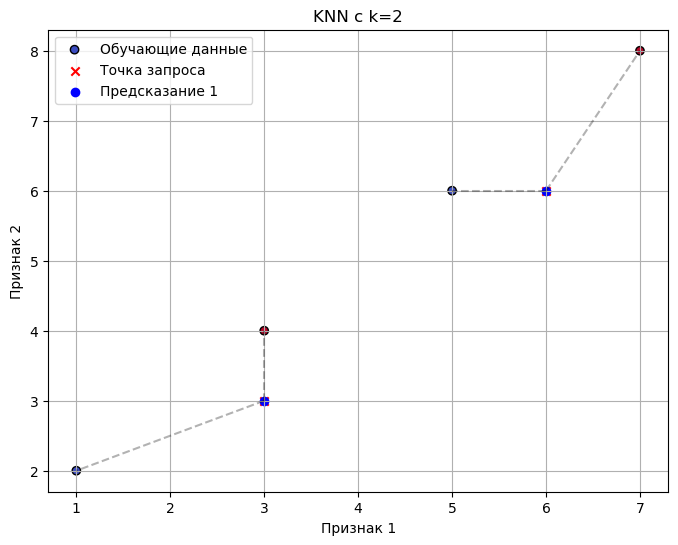

In [14]:
# График
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', label='Обучающие данные')
plt.scatter(X_test[:, 0], X_test[:, 1], color='red', marker='x', label='Точка запроса')

for i, (point, pred) in enumerate(zip(X_test, predictions)):
    plt.scatter(point[0], point[1], color='blue', marker='o', label=f'Предсказание {i + 1}' if i == 0 else None)
    for neighbor_idx in np.argsort(np.sum((X_train - point)**2, axis=1))[:k]:
        plt.plot([point[0], X_train[neighbor_idx, 0]], [point[1], X_train[neighbor_idx, 1]], 'k--', alpha=0.3)

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title(f'KNN с k={k}')
plt.legend()
plt.grid(True)
plt.show()